In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

#훈련 세트 정확도가 100이 나온 것은 좋은 건 아니므로 다시 조정이 들어갈 필요가 있어보임.

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [3]:
#cross_val_score에 들어가는 매개변수는 (모델명, 훈련데이터, 타깃, cv 개수)

from sklearn.model_selection import cross_val_score

X=cancer.data
y=cancer.target

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))

cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

print(cvscores)

훈련 세트 정확도: 1.000
테스트 세트 정확도 CV = 10: 0.960

테스트 세트 정확도 CV = 5: 0.963

[0.92982456 0.94736842 0.97368421 0.98245614 0.98230088]


In [4]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}".format(cvscores.mean()))

# tree max_depth를 1로 낮춰준 것은 과적합을 피하고 테스트데이터 성능을 향상시키기 위함이다.
# 훈련 세트 정확도가 0.99로 우수하다고 판단되며, 테스트 세트의 정확도도 높은 수준으로 판단됨.

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV=10: 0.961
테스트 세트 정확도 CV=5: 0.965


In [5]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}".format(cvscores.mean()))

#학습률을 조정했을 경우에는 훈련 세트 정확도가 0.98, 테스트 세트 정확도는 0.94로 낮은 수준은 아니지만 트리 깊이 조정시가 더 정확도가 높음.

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965
테스트 세트 정확도 CV=10: 0.946
테스트 세트 정확도 CV=5: 0.944


In [6]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}".format(cvscores.mean()))

#트리 깊이 조정을 1로 하고 학습률을 0.01로 주었을 땐, 훈련 세트 정확도가 낮아졌음을 확인함.
#일반화를 위해 10번 정도 돌렸을 때, 0.926으로 분류되었고 일반화가 가능할지에 대해 생각해봐야함.

훈련 세트 정확도: 0.927
테스트 세트 정확도: 0.958
테스트 세트 정확도 CV=10: 0.926
테스트 세트 정확도 CV=5: 0.924


특성 중요도 : 
[0.00000000e+00 9.07529959e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.32035766e-03 2.65686907e-01
 3.49588341e-04 0.00000000e+00 0.00000000e+00 3.00083378e-04
 0.00000000e+00 1.45838255e-02 1.05083243e-03 0.00000000e+00
 4.75469106e-03 0.00000000e+00 9.56890421e-04 0.00000000e+00
 9.23939383e-03 1.61819935e-02 3.22495788e-01 9.24249926e-02
 6.44041105e-03 0.00000000e+00 6.85101108e-03 2.31450675e-01
 6.41500790e-03 3.42225071e-03]


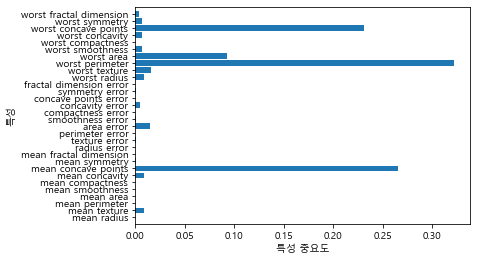

In [7]:
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    plt.show()

print("특성 중요도 : \n{}".format(gbrt.feature_importances_))

plot_feature_importances_cancer(gbrt)

#그레이디언트 부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트와 비슷한 특성을 강조하고 있음.
#다만 그레이디언트 부스티으이 경우 일부 특성을 무시함.
#비슷한 종류의 데이터에서 랜덤 포레스트를 먼저 적용함. 
#이때, 예측 시간이 중요하거나 머신러닝 모델 성능을 쥐어짜야할 때, 그레이디언트 부스팅을 사용하면 도움됨.

In [8]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

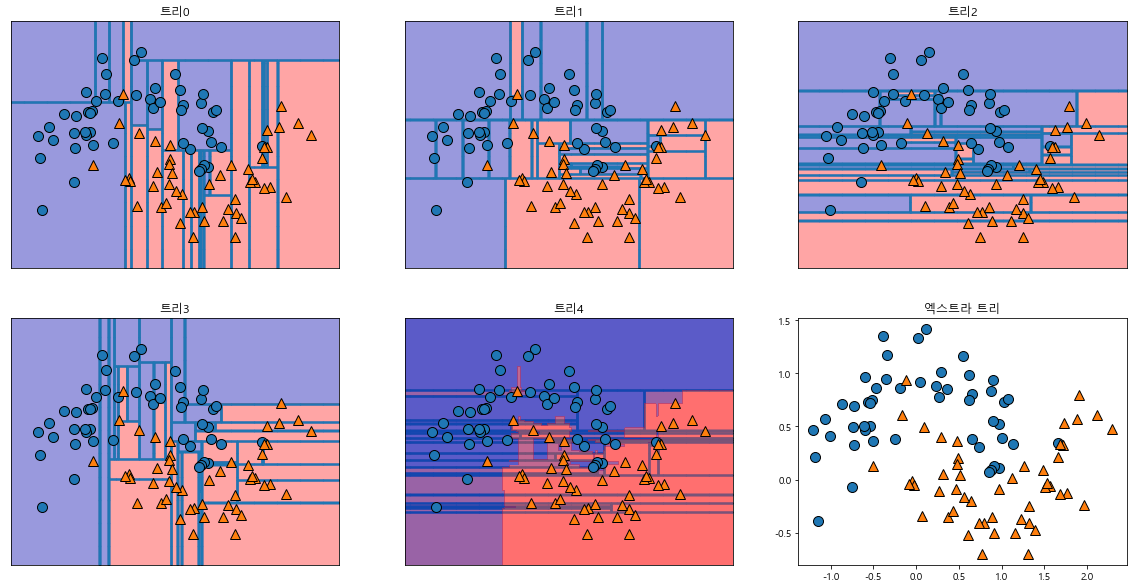

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,1], alpha=.4)
axes[-1,-1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [10]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(Xc_test, yc_test)))

cvscores = cross_val_score(xtree,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(xtree,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}".format(cvscores.mean()))

#훈련세트 정확도를 보니 과대적합이 나옴.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV=10: 0.970
테스트 세트 정확도 CV=5: 0.970


In [11]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0, max_depth=5)
xtree.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(Xc_test, yc_test)))

cvscores = cross_val_score(xtree,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(xtree,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}".format(cvscores.mean()))

#엑스트라 트리 모델은 랜덤포레스트보다 계산 비용은 적지만 무작위 분할로 일반화 성능을 높이기 위해 많은 트리 사용이 필요함.
#최대 깊이를 5개로 설정한 후, 훈련 세트 정확도는 0.972 / 10번 돌렸을 때의 테스트 세트 정확도가 0.953으로 높은 성능이 보여짐.

훈련 세트 정확도: 0.972
테스트 세트 정확도: 0.951
테스트 세트 정확도 CV=10: 0.953
테스트 세트 정확도 CV=5: 0.947


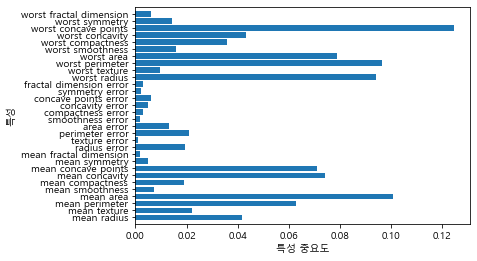

In [12]:
plot_feature_importances_cancer(xtree)

#특성 중요도는 랜덤 포레스트와 비슷함.

In [13]:
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
#현재 scikit-learn 0.22 이상의 버전인 경우 LogisticRegression solver 파라미터의 기본 값이 "liblinear"dptj "lbfgs"로 변경됨.
#RandomForestClassifier 의 경우 n_estimators 기본값이 100으로 변경됨.

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf', rnd_clf), ('dt',dt_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [15]:
#직접투표(hard) 
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [16]:
#간접투표(soft) 일때도 값은 값이 출력되는 것을 보임.
voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf', rnd_clf), ('dt',dt_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [17]:
#위에서 값은 값이 출력되어 결정트리 max_depth를 5로 조정해보았음. 결과값이 0.928로 약간 상승함.

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth = 5, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf', rnd_clf), ('dt',dt_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.928


In [18]:
#간접투표(soft)의 경우, 정확도가 0.904로 떨어졌으며 최대깊이 3으로 했을때와 같은 값이 출력됨을 확인

voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf', rnd_clf), ('dt',dt_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [19]:
#oob_score=True 로 해주면 훈련이 끝나는 후 자동으로 oob 평가를 수행함.

from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)

print("oob_score:", bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

#데이터가 적을 경우 검증(테스트) 데이터로 oob data 사용가능 -> 테스트 데이터와는 다르다.

oob_score: 0.8986666666666666


0.912

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3,random_state=42, eval_metric='logloss', use_label_encoder=False)

# label_encoder_deprecation_msg, UserWarning 시, use_label_encoder=False 추가해주면 됨.

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.872

Text(0, 0.5, '특성 1')

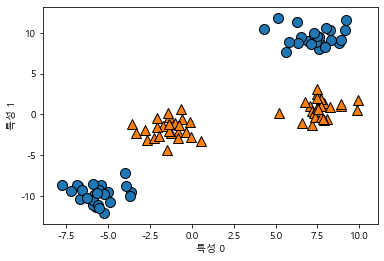

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

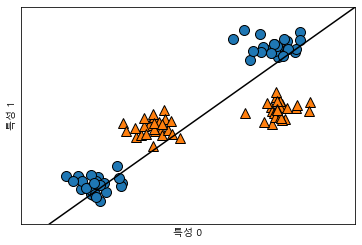

In [23]:
#LinearSVC의 경우 max_iter 값 지정안해주면 기본 값 1000으로 설정되기에 Liblinear failed to converge, increase " warning warn.
# max_iter=5000, tol=1e-3 으로 지정해줘야함.

from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1 ** 2')

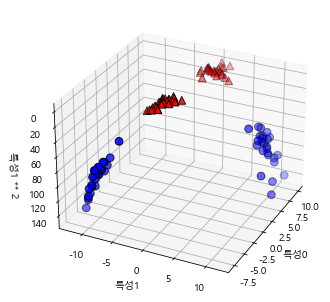

In [24]:
#두 번째 특성을 제곱하여 추가하고, 3차원 그래프 그리기

from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:,1:] **2])
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
mask = y ==0

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0.5, 0, '특성1 ** 2')

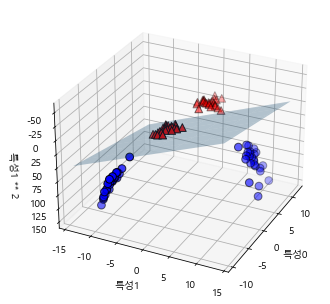

In [25]:
# 선형 결정 경계 그리기 (확장된 3차원 데이터셋에서 선형 SVM이 만든 결정 경계)

linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:, 0].max() +2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:, 1].max() +2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX +coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

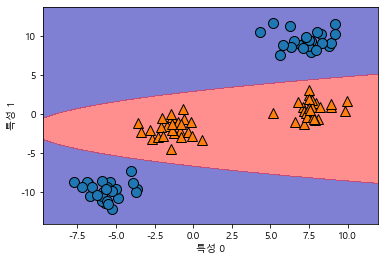

In [26]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

#여기서 0을 실수로 빼먹으면, 결정경계가 안나뉘므로 주의!
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#선형보다 타원에 가까운 결정경계로 나뉨 -> 원래 특성으로 투영해본 상태

In [27]:
from sklearn.svm import SVC

Text(0, 0.5, '특성 1')

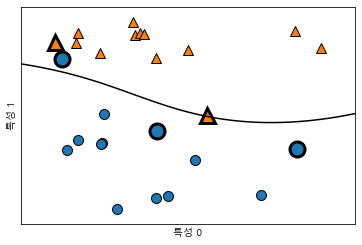

In [28]:
# 매우 부드럽고 비선형적인 경계 만듬.

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

mglearn.discrete_scatter(X[:,0], X[:,1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:,0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

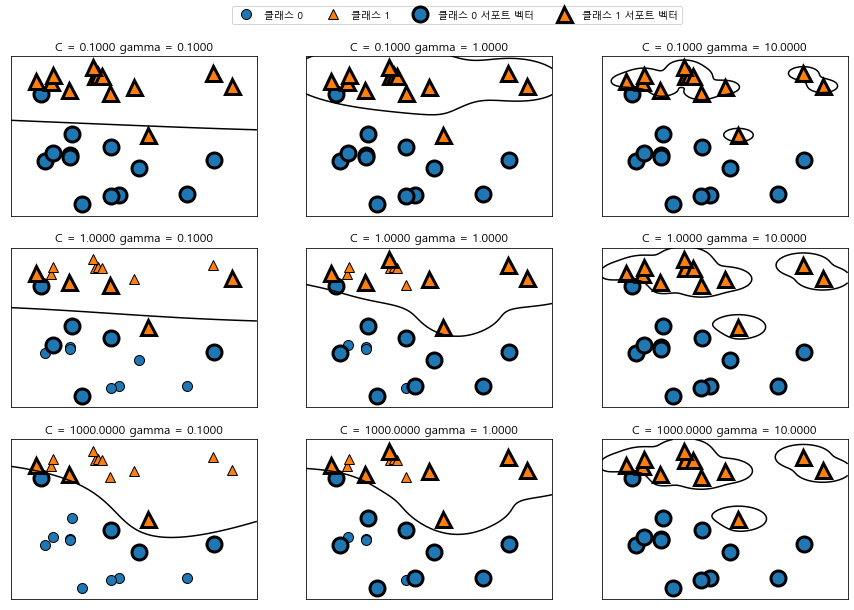

In [29]:
#gamma(커널 폭의 역수 1/r) 값이 클수록 클래스 1의 포인트 반경이 작아지고, 모델이 복잡해짐.
#C(규제매개변수-각 포인트의 중요도) 값이 증가할 수록 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 함.

fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

In [30]:
# SVC(C=1, gamma= 'auto') 이렇게 설정을 해주어야 책에 나온 것처럼 훈련 세트와 테스트 세트 정확도가 나옴. (auto = 1 / n_features)
# skcit=learn 0.20 버전에서 gamma 매개변수 옵션에  scale 이 추가됨. (scale = 1/ (n_features*X.var()):variance)
# 기본값으로 SVC()로 run 하면 훈련 세트, 테스트 세트 모두 0.90이상으로 높은 성능을 나타내줌.
# 현재 결과 값은 훈련 세트에는 최적이지만, 테스트 세트 정확도를 보면 매우 안 좋다는 것을 보여줌.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,cancer.target,random_state=0)

svc = SVC(C=1, gamma= 'auto')
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


In [31]:
svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

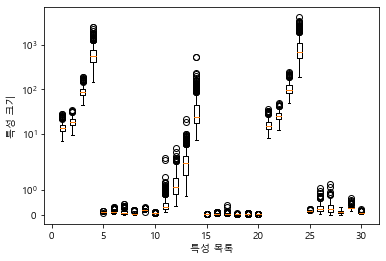

In [32]:
# boxplot() got an unexpected keyword argument 'manage_xticks' 로 manage_ticks=False로 수정해줘야 함.

plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [33]:
min_on_training = X_train.min(axis=0)

range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [34]:
#현재 버전의 차이로 전 버전인 gamma = 'auto'값을 주면 책과 같은 결과

X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도:0.948
테스트 세트 정확도:0.951


In [35]:
#gamma = 'scale'로 기본값이 변경되면서, 훈련 세트와 테스트 세트의 정확도가 더욱 향상됨을 보여줌.
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도:0.984
테스트 세트 정확도:0.972


In [36]:
# C 값을 1000으로 조정했을 때, 책의 결과와 달리 과대적합 의심이 되는 훈련 세트 정확도 1.00이 나옴.

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도:{:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.958


Text(0, 0.5, '특성 1')

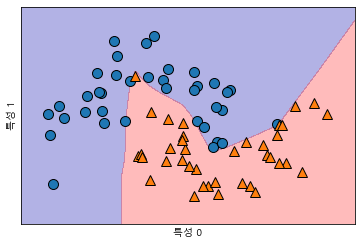

In [37]:
#MLP = (Multilayer Perceptron, 다층 퍼셉트론 구현)
#매우 비선형적이지만 비교적 매끄러운 결정 경계를 만들었음.
#MLP는 기본값으로 hidden_unit=100인데, 작은 데이터셋에는 과분한 크기-> hidden_unit 개수를 줄여보겠음. 

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

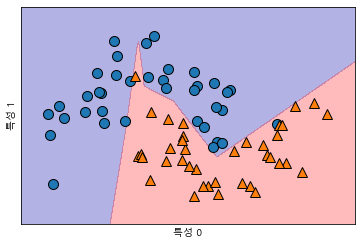

In [38]:
#hidden_unit 개수를 줄여도 여전히 좋은 결과를 얻을 수 있음.
#결정 경계가 더 날카로워졌고, 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성됨.

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

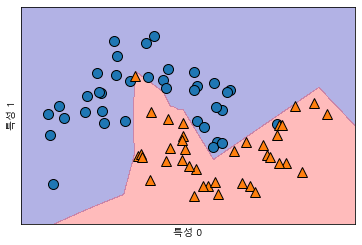

In [39]:
#10개의 은닉 유닛을 가진 두 개의 은닉층과 relu 활성화 함수로 만든 결정 경계
#위의 하나의 층으로 된 것보다 결정 경계가 좀 더 매끄러워짐.

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

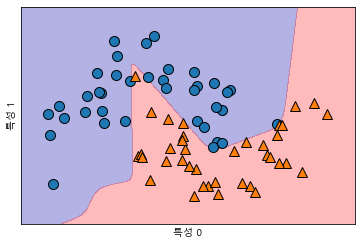

In [40]:
#tanh 활성화 함수로 만든 결정 경계 (결정 경계를 좀 더 매끄럽게 해줌.)
#결론은 결정경계를 매끄럽게 하기 위해서 hidden_unit 개수를 추가하거나 hidden_layer 을 추가하거나 tanh 활성화 함수를 사용

mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

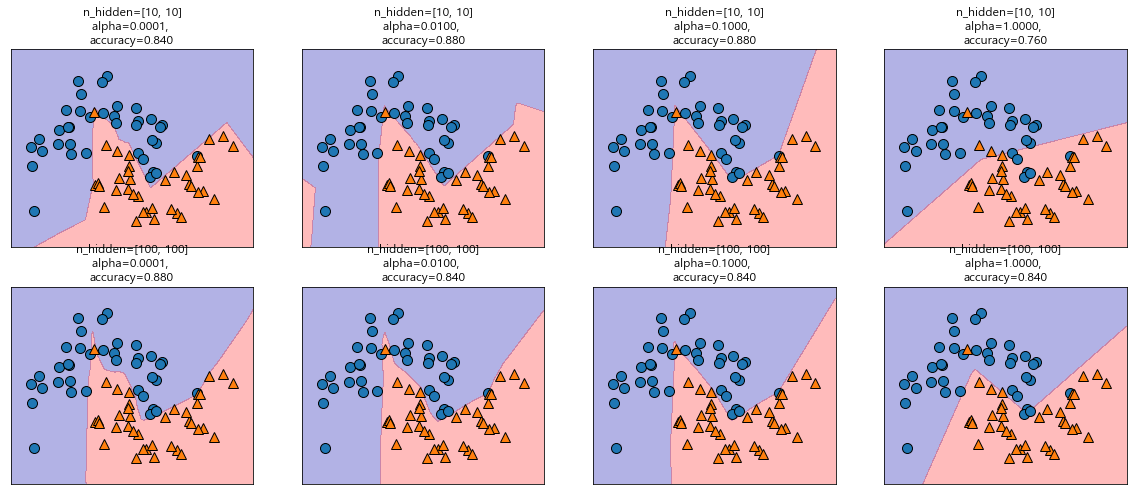

In [41]:
#규제 - alpha 값
#hidden_layer가 2개이고 hidden_unit 의 개수가 10개이고 alpha 값을 10000로 주었을 경우 정확도는 0.76으로 낮게 분류됨.
#그 외의 경우는 정확도가 0.80 이상이지만 높은 정확도라고는 볼 수 없음.

fig, axes = plt.subplots(2,4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}, \naccuracy={:.3f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha, mlp.score(X_test,y_test)))

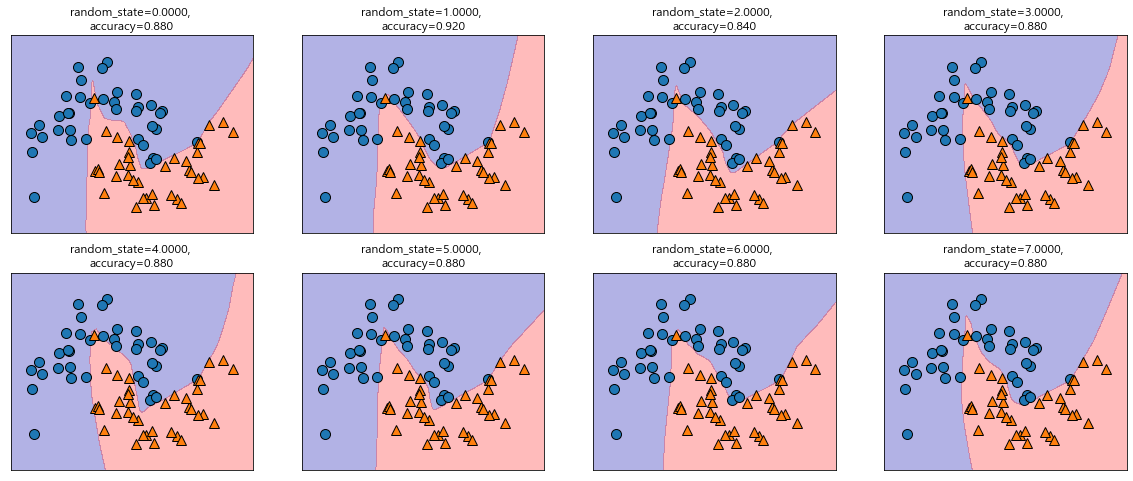

In [42]:
#무작위로 다른 초깃값을 주되(random_state=i) 같은 매개변수로 학습한 결정 경계
#random_state=1 일때의 정확도는 0.92로 가장 높게 분류됨. 

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("random_state={:.4f}, \naccuracy={:.3f}".format(mlp.random_state, mlp.score(X_test,y_test)))

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("훈련 세트 정확도:{:.2f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도:{:.2f}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도:0.94
테스트 세트 정확도:0.92


In [44]:
#평균 계산
mean_on_train = X_train.mean(axis=0)
#표준 편차 계산
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train-mean_on_train) / std_on_train
X_test_scaled = (X_test-mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

#최대 반복 횟수에 도달했다고 경고, adam algorithm 관한 것으로 경고가 나오면 반복 횟수를 늘려야함.

훈련 세트 정확도:0.991
테스트 세트 정확도:0.965


C:\Users\lumit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
#현재 결과는 지금까지 가장 좋은 모델의 성능과 동일함.
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.972


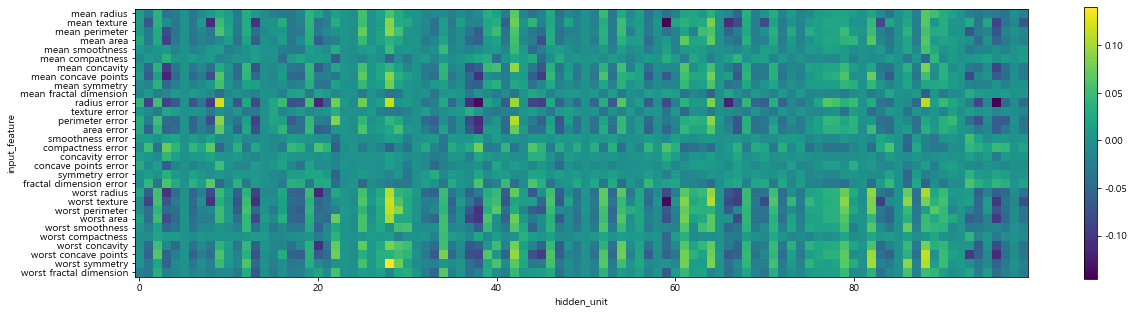

In [46]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden_unit")
plt.ylabel("input_feature")
plt.colorbar()